In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("./performance data from ilkarman_DeepLearningFrameworks.csv")

In [30]:
df.head()

,Library,Problem,Environment,Time,TimeUnit
0,Caffe2,"CNN (VGG-style, 32bit) on CIFAR-10 - Image Rec...",K80/CUDA 8/CuDNN 6,148.0,s
1,Chainer,"CNN (VGG-style, 32bit) on CIFAR-10 - Image Rec...",K80/CUDA 8/CuDNN 6,162.0,s
2,CNTK,"CNN (VGG-style, 32bit) on CIFAR-10 - Image Rec...",K80/CUDA 8/CuDNN 6,163.0,s
3,MXNet (Gluon),"CNN (VGG-style, 32bit) on CIFAR-10 - Image Rec...",K80/CUDA 8/CuDNN 6,152.0,s
4,Keras (CNTK),"CNN (VGG-style, 32bit) on CIFAR-10 - Image Rec...",K80/CUDA 8/CuDNN 6,194.0,s


In [31]:
df['Problem'].value_counts()

CNN (VGG-style, 32bit) on CIFAR-10 - Image Recognition    26
ResNet-50 - Feature Extraction                            24
RNN (GRU) on IMDB - Sentiment Analysis                    18
Name: Problem, dtype: int64

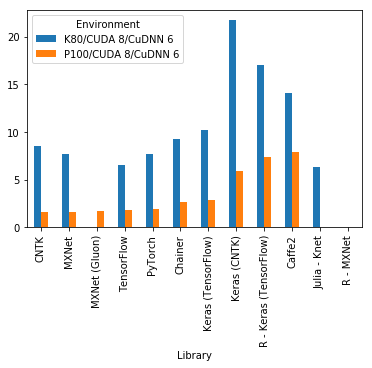

In [5]:
df.loc[lambda df: df.Problem == "ResNet-50 - Feature Extraction"] \
  .pivot("Library", "Environment", "Time") \
  .sort_values(by="P100/CUDA 8/CuDNN 6") \
  .plot(kind='bar')

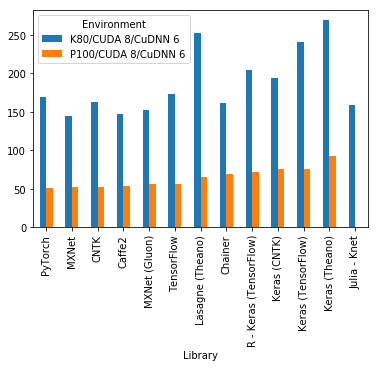

In [6]:
df.loc[lambda df: df.Problem == "CNN (VGG-style, 32bit) on CIFAR-10 - Image Recognition"] \
  .pivot("Library", "Environment", "Time") \
  .sort_values(by="P100/CUDA 8/CuDNN 6") \
  .plot(kind='bar')

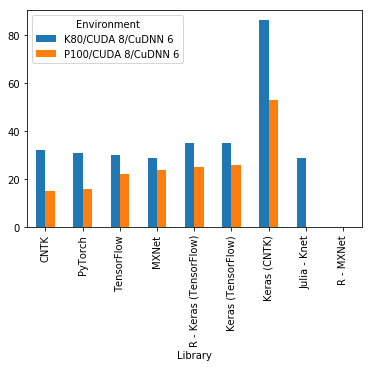

In [7]:
df.loc[lambda df: df.Problem == "RNN (GRU) on IMDB - Sentiment Analysis"] \
  .pivot("Library", "Environment", "Time") \
  .sort_values(by="P100/CUDA 8/CuDNN 6") \
  .plot(kind='bar')

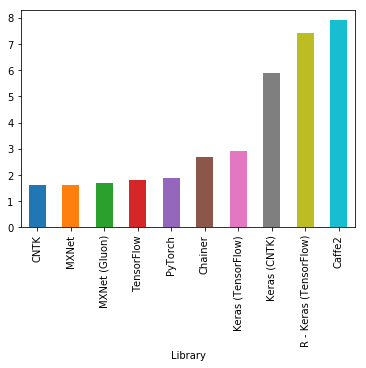

In [8]:
df.loc[lambda df: df.Problem == "ResNet-50 - Feature Extraction"] \
  .pivot("Library", "Environment", "Time")['P100/CUDA 8/CuDNN 6'] \
  .dropna() \
  .sort_values() \
  .plot(kind='bar')

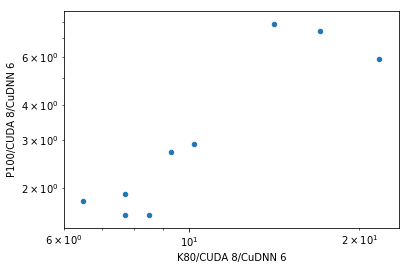

In [9]:
df.loc[lambda df: df.Problem == "ResNet-50 - Feature Extraction"] \
  .pivot("Library", "Environment", "Time") \
  .plot.scatter(x='K80/CUDA 8/CuDNN 6', y='P100/CUDA 8/CuDNN 6', logx=True, logy=True)

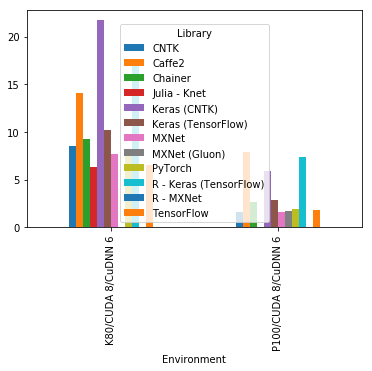

In [10]:
df.loc[lambda df: df.Problem == "ResNet-50 - Feature Extraction"] \
  .pivot("Environment", "Library", "Time") \
  .plot(kind='bar')

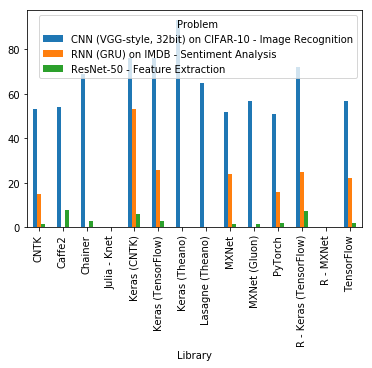

In [11]:
df.loc[lambda df: df.Environment == "P100/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .plot(kind='bar')

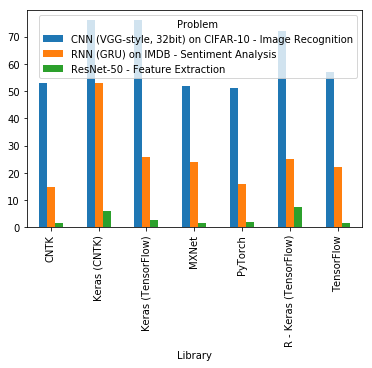

In [12]:
df.loc[lambda df: df.Environment == "P100/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .dropna() \
  .plot(kind='bar')

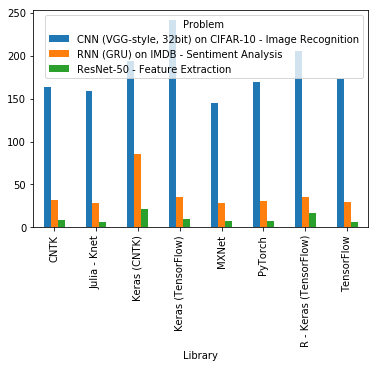

In [13]:
df.loc[lambda df: df.Environment == "K80/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .dropna() \
  .plot(kind='bar')

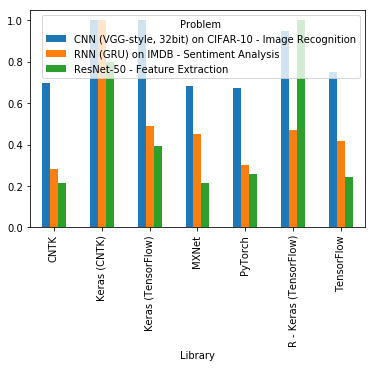

In [16]:
# normalized
z = df.loc[lambda df: df.Environment == "P100/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .dropna()

(z / z.max()).plot(kind='bar')

Text(0,0.5,'Relative time (TensorFlow=1)')

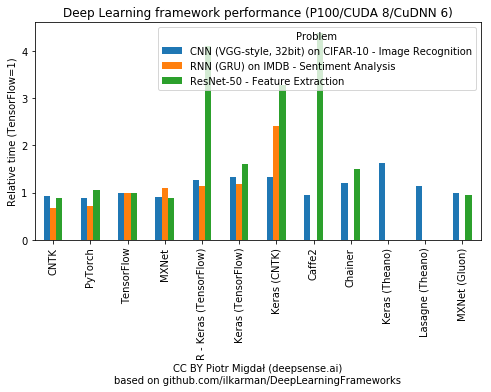

In [56]:
# TF= 1
z = df.loc[lambda df: df.Environment == "P100/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .dropna(0, 'all') \
  .sort_values(by="RNN (GRU) on IMDB - Sentiment Analysis")

(z / z.loc['TensorFlow']).plot(kind='bar', figsize=(8,4))
plt.title("Deep Learning framework performance (P100/CUDA 8/CuDNN 6)")
plt.xlabel("CC BY Piotr Migdał (deepsense.ai)\nbased on github.com/ilkarman/DeepLearningFrameworks")
plt.ylabel("Relative time (TensorFlow=1)")

CNN (VGG-style, 32bit) on CIFAR-10 - Image Recognition
ResNet-50 - Feature Extraction
RNN (GRU) on IMDB - Sentiment Analysis 

Text(0,0.5,'Relative time (TensorFlow=1)')

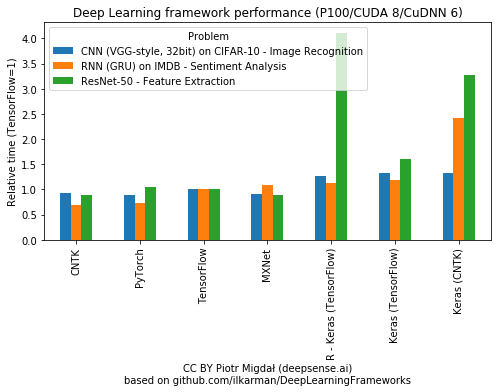

In [58]:
# TF= 1
z = df.loc[lambda df: df.Environment == "P100/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .dropna() \
  .sort_values(by="RNN (GRU) on IMDB - Sentiment Analysis")

(z / z.loc['TensorFlow']).plot(kind='bar', figsize=(8,4))
plt.title("Deep Learning framework performance (P100/CUDA 8/CuDNN 6)")
plt.xlabel("CC BY Piotr Migdał (deepsense.ai)\nbased on github.com/ilkarman/DeepLearningFrameworks")
plt.ylabel("Relative time (TensorFlow=1)")

Text(0,0.5,'Relative speed (TensorFlow=1)')

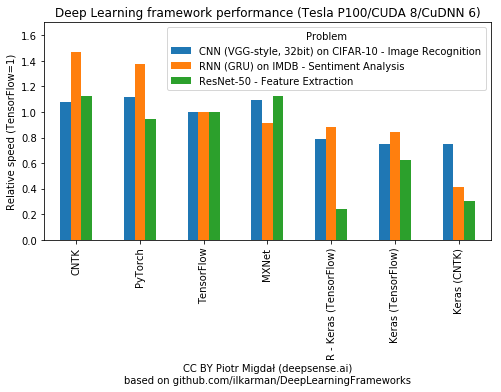

In [73]:
# TF= 1
z = df.loc[lambda df: df.Environment == "P100/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .dropna() \
  .sort_values(by="RNN (GRU) on IMDB - Sentiment Analysis")

(z.loc['TensorFlow'] / z).plot(kind='bar', figsize=(8,4), ylim=(0, 1.7))
plt.title("Deep Learning framework performance (Tesla P100/CUDA 8/CuDNN 6)")
plt.xlabel("CC BY Piotr Migdał (deepsense.ai)\nbased on github.com/ilkarman/DeepLearningFrameworks")
plt.ylabel("Relative speed (TensorFlow=1)")

Text(0,0.5,'Relative time (TensorFlow=1)')

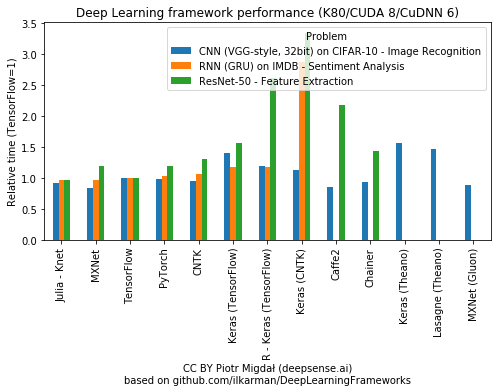

Text(0,0.5,'Relative time (TensorFlow=1)')

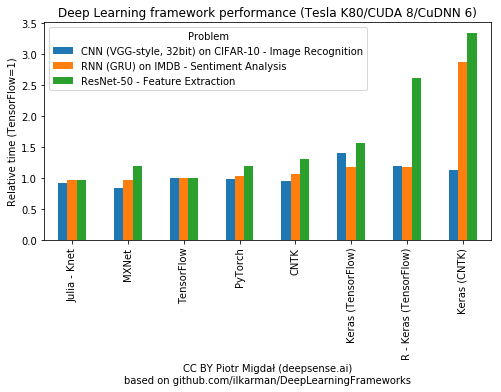

In [74]:
# TF= 1
z = df.loc[lambda df: df.Environment == "K80/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .dropna() \
  .sort_values(by="RNN (GRU) on IMDB - Sentiment Analysis")

(z / z.loc['TensorFlow']).plot(kind='bar', figsize=(8,4))
plt.title("Deep Learning framework performance (Tesla K80/CUDA 8/CuDNN 6)")
plt.xlabel("CC BY Piotr Migdał (deepsense.ai)\nbased on github.com/ilkarman/DeepLearningFrameworks")
plt.ylabel("Relative time (TensorFlow=1)")

Text(0,0.5,'Relative speed (TensorFlow=1)')

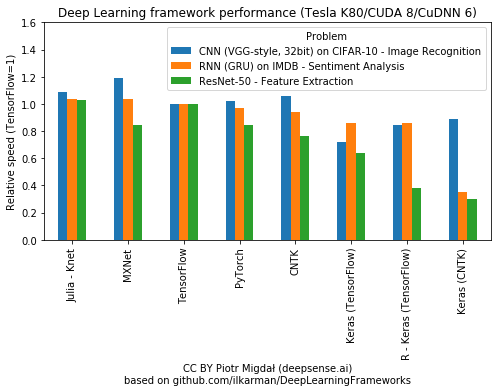

In [75]:
# TF= 1
z = df.loc[lambda df: df.Environment == "K80/CUDA 8/CuDNN 6"] \
  .pivot("Library", "Problem", "Time") \
  .dropna() \
  .sort_values(by="RNN (GRU) on IMDB - Sentiment Analysis")

(z.loc['TensorFlow'] / z).plot(kind='bar', figsize=(8,4), ylim=[0, 1.6])
plt.title("Deep Learning framework performance (Tesla K80/CUDA 8/CuDNN 6)")
plt.xlabel("CC BY Piotr Migdał (deepsense.ai)\nbased on github.com/ilkarman/DeepLearningFrameworks")
plt.ylabel("Relative speed (TensorFlow=1)")